<a href="https://colab.research.google.com/github/srock01/AISpring2024/blob/main/HW7/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7
By: Sean Rock

Problem: NASA Asteroid Classification

In [26]:
#@title Load the dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/nasa_asteroid.csv')

In [27]:
#@title Set the relevant columns to X and the target (hazardous) to Y
X = data.drop('Neo Reference ID', axis=1)
X = X.drop('Name', axis=1)
X = X.drop('Est Dia in KM(min)', axis=1)
X = X.drop('Est Dia in KM(max)', axis=1)
X = X.drop('Est Dia in Miles(min)', axis=1)
X = X.drop('Est Dia in Miles(max)', axis=1)
X = X.drop('Est Dia in Feet(min)', axis=1)
X = X.drop('Est Dia in Feet(max)', axis=1)
X = X.drop('Close Approach Date', axis=1)
X = X.drop('Epoch Date Close Approach', axis=1)
X = X.drop('Orbiting Body', axis=1)
X = X.drop('Orbit ID', axis=1)
X = X.drop('Equinox', axis=1)
X = X.drop('Hazardous', axis=1)
X = X.drop('Orbit Determination Date', axis=1)
Y = data.Hazardous

In [7]:
#@title Scale the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

Overall Training Accuracy: 0.9976287262872628
Overall Test Accuracy: 0.9914712153518124


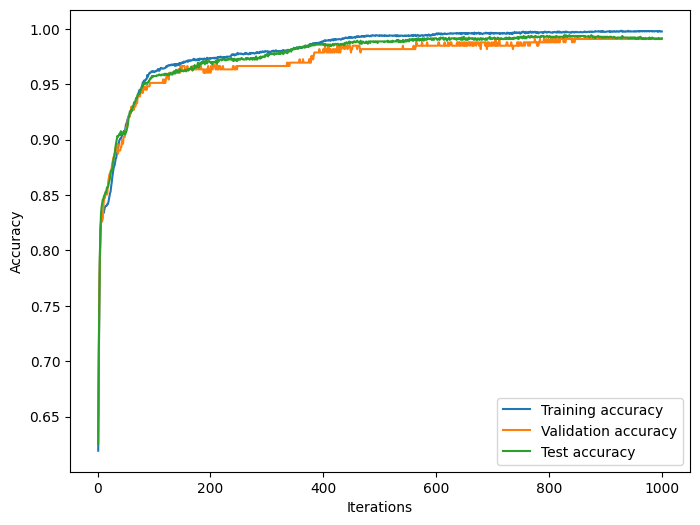

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, Y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(5), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

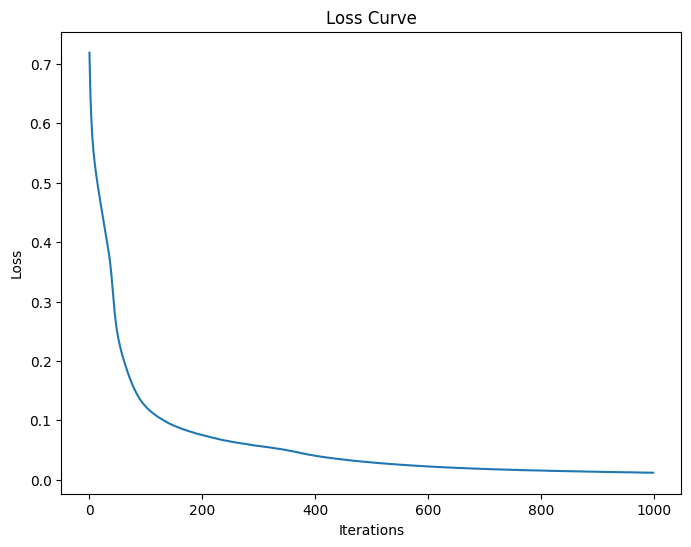

In [31]:
#@title Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


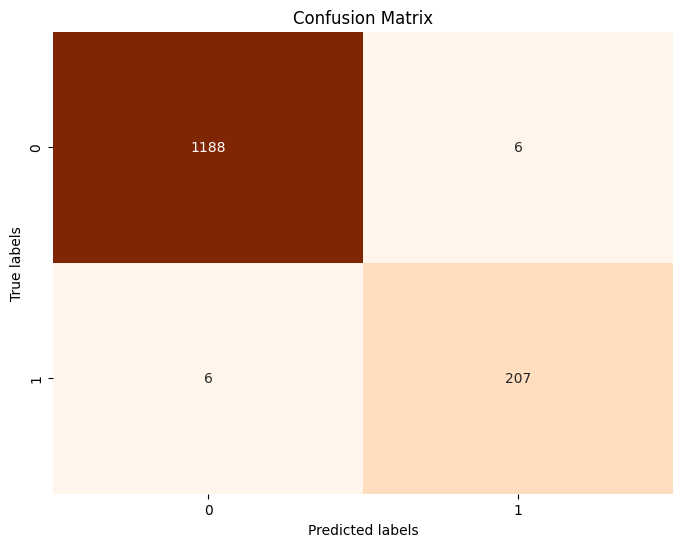

In [30]:
#@title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

###Different Hyper Parameters Table
As seen below, the model performs best with between 5-10 neurons in a single layer. If there are less or more than that, the model won't be as accurate. It is worse when there are more layers or neurons because it becomes overfitted for the training data making it less generalized and thus less effective when evaluating the test data.

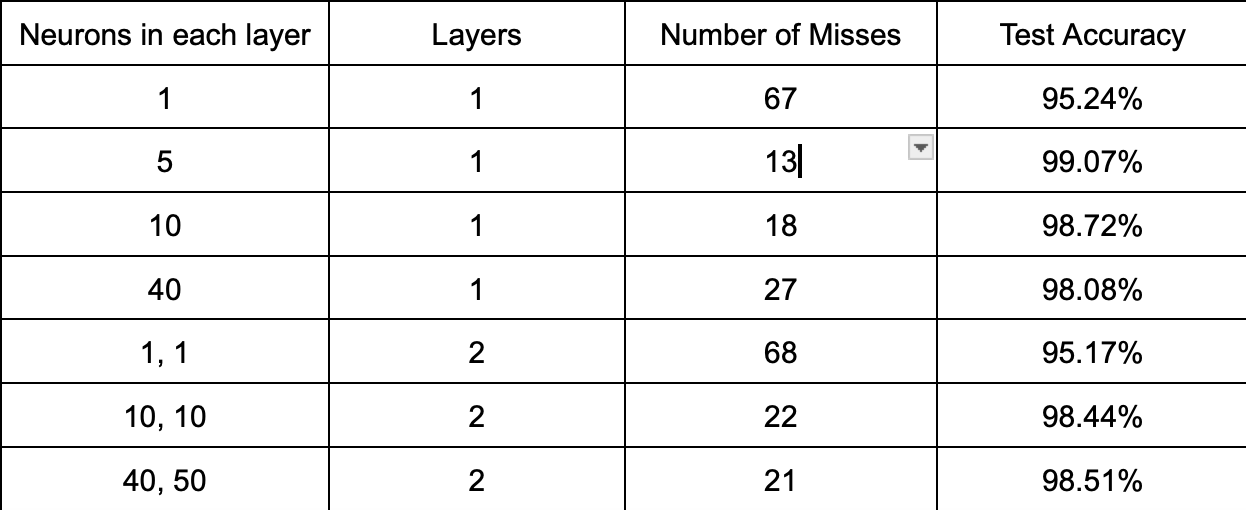

